## 課題 1-4 選択した3つの銘柄，及びその 3 銘柄からなるポートフォリオの，合計 4 つの場合について，それぞれ 1 年間に対応するシャープレシオを計算して，表 1-3 にまとめてください

## 日本10年 利回り +0.024	6月30日取得

## シャープレシオ(Sharpe ratio)

In [1]:
import pandas as pd
import numpy as np
sony19=pd.read_csv("6758_2019.csv",encoding="SHIFT-JIS",header=1)
sony20=pd.read_csv("6758_2020.csv",encoding="SHIFT-JIS",header=1)


softbank1=pd.read_csv("9984_2019.csv",encoding="SHIFT-JIS",header=1)
softbank2=pd.read_csv("9984_2020.csv",encoding="SHIFT-JIS",header=1)


KEYENCE2=pd.read_csv("6861_2020.csv",encoding="SHIFT-JIS",header=1)
KEYENCE1=pd.read_csv("6861_2019.csv",encoding="SHIFT-JIS",header=1)

In [2]:
sony=pd.concat([sony19,sony20])
softbank=pd.concat([softbank1,softbank2])
KEYENCE=pd.concat([KEYENCE1,KEYENCE2])
sony.index=sony["日付"]
softbank.index=softbank["日付"]
KEYENCE.index=KEYENCE["日付"]

In [3]:
sony_1year=sony[78:328]
softbank_1year=softbank[78:328]
KEYENCE_1year=KEYENCE[78:328]
KEYENCE[78:328]

,日付,始値,高値,安値,終値,出来高,終値調整値
日付,,,,,,,
2019-05-07,2019-05-07,68360,69260,67670,68190,577000,68190
2019-05-08,2019-05-08,67000,67740,66710,67440,395900,67440
2019-05-09,2019-05-09,67000,68150,66650,66770,368600,66770
2019-05-10,2019-05-10,66900,67700,66110,66690,417800,66690
2019-05-13,2019-05-13,66300,66470,65730,65860,276600,65860
...,...,...,...,...,...,...,...
2020-05-11,2020-05-11,39600,40030,39320,39990,422300,39990
2020-05-12,2020-05-12,40210,40370,39870,40160,401900,40160
2020-05-13,2020-05-13,39630,39730,39280,39370,694300,39370


In [4]:
yA= 686500/ (686500+457400+388700)
yB= 457400/ (686500+457400+388700)
yC= 388700/ (686500+457400+388700)

In [5]:
#収益率の期待値
muA=np.average((sony_1year["終値調整値"]/sony_1year["終値調整値"].shift(1))[1:]-1)*250
muB=np.average((softbank_1year["終値調整値"]/softbank_1year["終値調整値"].shift(1))[1:]-1)*250
muC=np.average((KEYENCE_1year["終値調整値"]/KEYENCE_1year["終値調整値"].shift(1))[1:]-1)*250

In [6]:
#年間ポートフォリオの期待値
up=yA*muA+yB*muB+yC*muC

In [7]:
up

0.0229660486753151

In [8]:
#一年無リスク金利
r=0.024/10

In [9]:
σp=np.sqrt(np.var((((sony_1year["終値調整値"]/sony_1year["終値調整値"].shift(1))[1:]-1)*yA+\
    ((softbank_1year["終値調整値"]/softbank_1year["終値調整値"].shift(1))[1:]-1)*yB+\
      ((KEYENCE_1year["終値調整値"]/KEYENCE_1year["終値調整値"].shift(1))[1:]-1)*yC)))*np.sqrt(250)

In [10]:
σp

0.33122912100294616

In [11]:
Sharpe_ratio=(up-r)/σp

In [12]:
#ポートフォリオのSharpe_ratio
Sharpe_ratio

0.062090098277114265

In [13]:
#A,B,C
sigmaA=np.sqrt(np.var(((sony_1year["終値調整値"]/sony_1year["終値調整値"].shift(1))[1:]-1)))*np.sqrt(250)
sigmaB=np.sqrt(np.var(((softbank_1year["終値調整値"]/softbank_1year["終値調整値"].shift(1))[1:]-1)))*np.sqrt(250)
sigmaC=np.sqrt(np.var(((KEYENCE_1year["終値調整値"]/KEYENCE_1year["終値調整値"].shift(1))[1:]-1)))*np.sqrt(250)

In [14]:
sigmaA

0.3080919710392663

In [15]:
sigmaB

0.5456427239073476

In [16]:
sigmaC

0.5817843137828067

In [17]:
Sharpe_ratioA=(muA-r)/sigmaA
Sharpe_ratioB=(muB-r)/sigmaB
Sharpe_ratioC=(muC-r)/sigmaC

In [18]:
Sharpe_ratioA

0.9232619116506776

In [19]:
Sharpe_ratioB

-0.14950013986836125

In [20]:
Sharpe_ratioC

-0.5591384218303197

## 課題 2:モンテカルロ法を用いた有効フロンティアの作成 メインパート

## 課題 2-1 (準備)有効フロンティア(空売り禁止)を描写
## 図 2-1

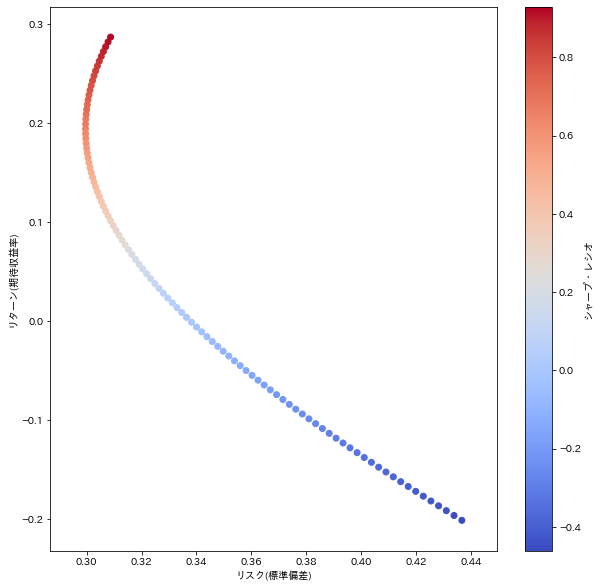

In [21]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))


prets = []
pvols = []
for p in range (101):
    p=p/100
    q=1-p
    weights = np.array([p,q/2,q/2])
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

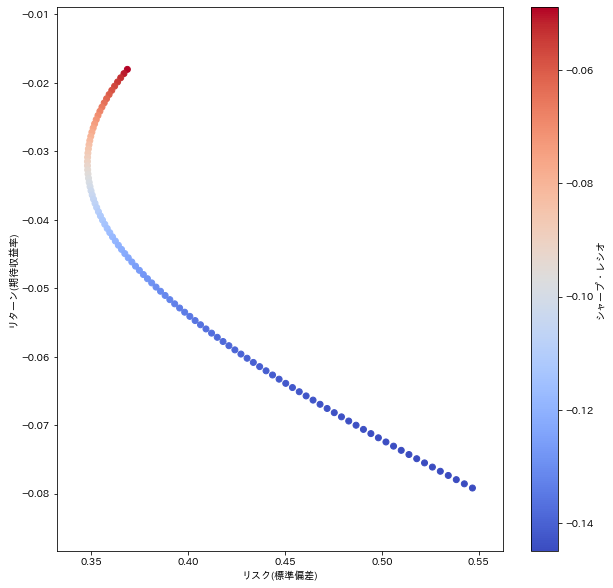

In [22]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))


prets = []
pvols = []
for p in range (101):
    p=p/100
    q=1-p
    weights = np.array([q/2,p,q/2])
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

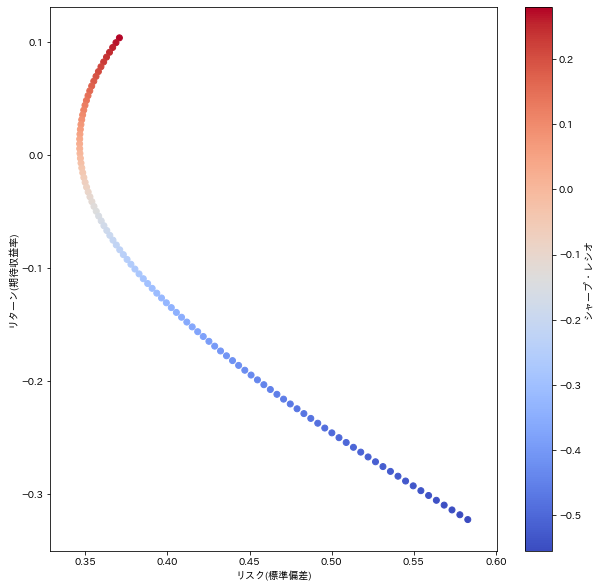

In [23]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))


prets = []
pvols = []
for p in range (101):
    p=p/100
    q=1-p
    weights = np.array([q/2,q/2,p])
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

## 課題 2-2 モンテカルロ・シミュレーションによる有効フロンティア(空売り禁止)の描写
## 図 2-2

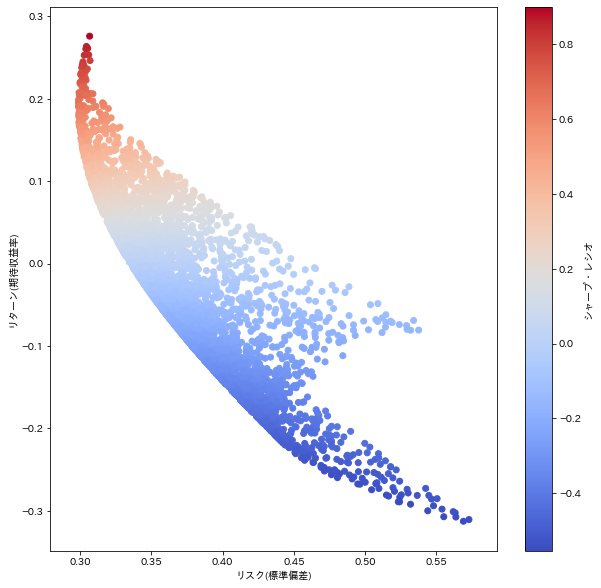

In [24]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))


prets = []
pvols = []
for p in range (5000):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

## 課題 2-3 完成版
## 図 2-3

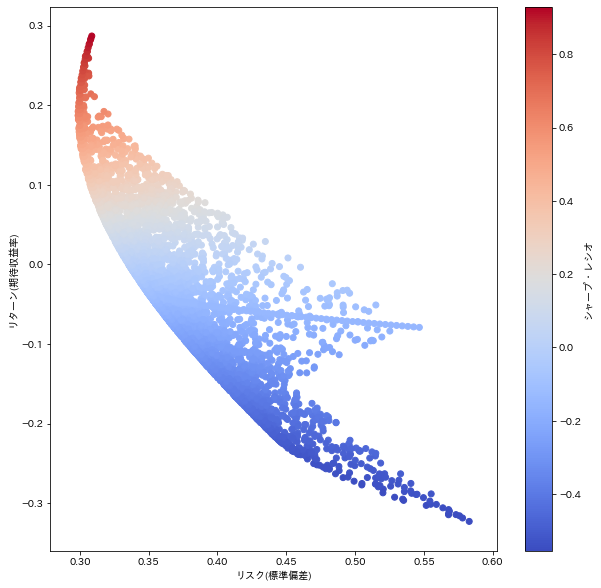

In [25]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))


prets = []
pvols = []
for x in range (5000):
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
for p in range (101):
    p=p/100
    q=1-p
    weights = np.array([q/2,q/2,p])
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))
for p in range (101):
    p=p/100
    q=1-p
    weights = np.array([q/2,p,q/2])
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))
for p in range (101):
    p=p/100
    q=1-p
    weights = np.array([p,q/2,q/2])
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))
            
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

## 課題 2-4 分析と考察
## ポートフォリオ選択の理論から見て，自分が選択した VIG ポートフォリオがポートフォリオ理論の観点から好ましいものであったかどうかの判断を，リスク回避的投資家の立場から理由を付けて客観的に評価，考察してください.

## ポートフォリオ選択の理論から見れば，私がが選択したVIG ポートフォリオでは、私が選択したポートフォリオではポートフォリオの最小分散点を見つかったことから、かつ最大リターンが０.3あたりで、最小分散点と離れていないことから、好ましいと考える。

## 課題 2-5 特殊ケースの検討
## 3 つの銘柄の収益率に関する相関係数が全て 0 であると仮定し，課題 2-2 と同様のグラフ図 2-4 を作成し て下さい.その上で，相関係数が非零の実際のケースと比べて，有効フロンティアがどのように変化した か，それがどのような意味を持つと考えられるかを分析して下さい.

## 図 2-4

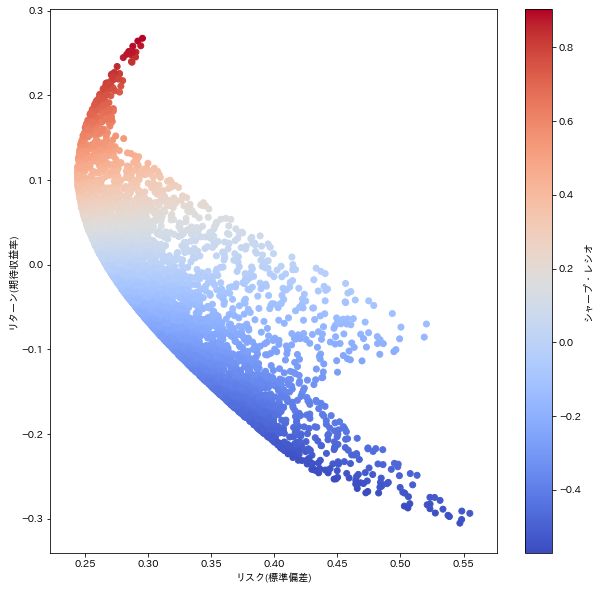

In [26]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov().values*np.identity(3)*250, weights)))


prets = []
pvols = []
for x in range (5000):
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
            
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

## 相関係数が非零の実際のケースと比べて，有効フロンティアがさらにリスクが減少し、最小分散点が0.25あたりに変わった。

## 課題 3:ベータの推定

## 課題 3-1:個別銘柄，及びポートフォリオのβ値の推定

## 表 3-1

## 課題 3-1:個別銘柄，及びポートフォリオのβ値の推定

In [27]:
TOPIX=pd.read_csv("TOPIX Historical Data.csv",encoding="SHIFT-JIS")

In [28]:
TOPIX["Price"]=TOPIX["Price"].str.replace(",","").astype(np.float32)

In [29]:
TOPIX=pd.concat([TOPIX["Price"],TOPIX["Price"][-40:]],ignore_index=True)

In [30]:
TOPIX

0      1261.699951
1      1327.880005
2      1385.119995
3      1406.680054
4      1388.969971
          ...     
245    1541.140015
246    1549.420044
247    1550.709961
248    1572.329956
249    1599.839966
Name: Price, Length: 250, dtype: float32

In [31]:
por=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)

In [32]:
ret_data = por.pct_change()[1:]
wts=np.array([yA,yB,yC])

In [33]:
port_ret = (ret_data * wts).sum(axis = 1)

In [34]:
data_ret = TOPIX.pct_change()[1:]

In [35]:
len(port_ret.values)

249

In [36]:
len(data_ret)

249

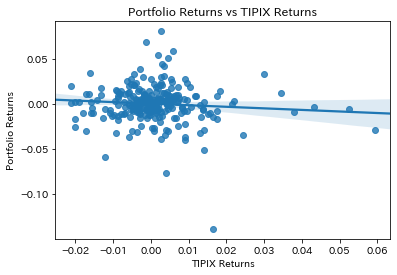

In [37]:
import seaborn as sns
sns.regplot(data_ret.values,
port_ret.values)
plt.xlabel("TIPIX Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs TIPIX Returns")
plt.show()

In [38]:
from scipy import stats
(beta, alpha) = stats.linregress(data_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is -0.173


## 課題 3-2:証券市場線

## TOPIXを市場ポートフォリオとして，証券市場線のグラフ(図3-2)を描き，その上に，選択した3銘柄，その 3 銘柄からなるポートフォリオが表す計 4 点を描きなさい.


In [39]:
#一年無リスク金利
r=0.024/10

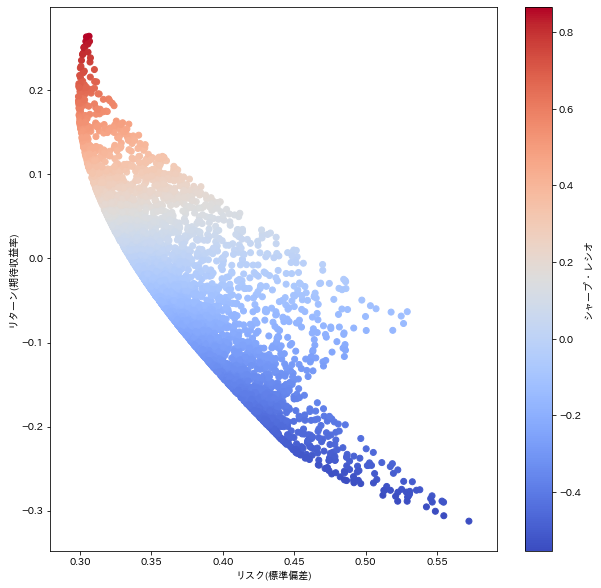

In [40]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
symbols = ['sony_1year', 'softbank_1year', 'KEYENCE_1year']
noa = len(symbols)
data=pd.concat([sony_1year["終値調整値"],softbank_1year["終値調整値"],KEYENCE_1year["終値調整値"]],axis=1)
data.columns=symbols
rets = (data / data.shift(1))-1


weights = np.random.random(noa)  
weights /= np.sum(weights)


def port_ret(weights):
    return np.sum(rets.mean() * weights) * 250



def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 250, weights)))


prets = []
pvols = []
for p in range (5000):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize=(10, 10))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('リスク(標準偏差)')
plt.ylabel('リターン(期待収益率)')
plt.colorbar(label='シャープ・レシオ')

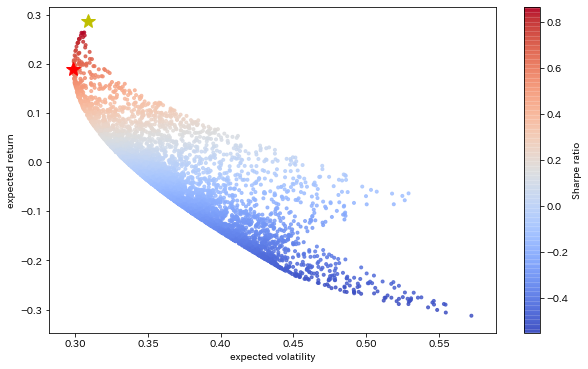

In [46]:
import scipy.optimize as sco
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])  
eweights
min_func_sharpe(eweights)
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)
opts
opts['x'].round(3)
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

bnds = tuple((0, 1) for x in weights)



tvols = np.array(tvols)

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')


plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

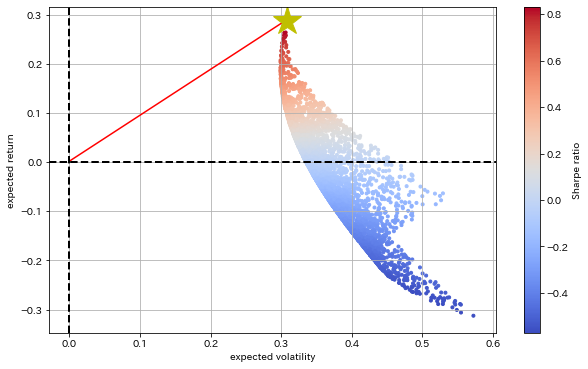

In [49]:
import scipy.interpolate as sci
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]

tck = sci.splrep(evols, erets)

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

def equations(p, rf=r):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0]  +0.9353 * cx, 'r', lw=1.5)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=30.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## グラフを見て，自分が選択した 3 銘柄を CAPM の観点からは、ポートフォリオの最大収益率は、市場ポートフォリオ点より高いとは言えないことから、このポートフォリオは良いポートフォリオ とは言えない。

## 課題 X:感想，コメント

## 分析の全体から見れば、ポートフォリオの収益率や、分散などの計算は、すごく大変だった、また、市場線をうまく描くことができなかったかもしれないが、各銘柄の平均や分散の計算方法など、たくさん勉強することができたと思う。